In [1]:
from scipy import *
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
import PlanktonSignaling.basicsPhototaxis as PS
import PlanktonSignaling.Deposition as DP

In [2]:
meshsize = 100 #Chemical Mesh size
numb = 3**2 #Number of plankton in simulation
LL = 10 #Length of domain [0,L] x [0,L]
dt = 0.02 #Time-stepping size
TotalTime = 10 #Total time 

simTime = int(TotalTime/dt) #Number of timesteps in order to achieve total Time 

#Simulation for Constant Function

Swimmers = PS.Plankton(DP.constantDep,d1=.1,d2=4,N = meshsize,depMaxStr=.01,
                        Const=3,L=LL,k=dt,epsilon=1e-3,depThreshold=0.012, 
                    depTransWidth=0.008, num = numb, c0=0.01)
def initial_conditions(x,y):
    return(Swimmers.c0 + x*0)

Swimmers.SetIC(initial_conditions)

lenn = int(np.sqrt(numb))
pos = np.zeros((numb,2))
vel = np.zeros((numb,2))
CHEM = np.zeros((simTime,meshsize,meshsize)) #preallocate the chemical 
POS = np.zeros((simTime,numb,2)) #preallocate the chemical 

#Place plankton down uniformly throughout the domain and give each a direction to travel initially
#Randomness can be added if desired.
i = 0
for l in range(0,lenn):
    for k in range(0,lenn):
        pos[i,:] = np.array([np.mod(k*(Swimmers.L*1/(lenn)) + 0.5*(Swimmers.L*1/(lenn)),Swimmers.L),
                                     np.mod(l*(Swimmers.L*1/(lenn)) + 0.5*(Swimmers.L*1/(lenn)),Swimmers.L)])
        th  = np.random.rand()*2*pi
        vel[i,:] = np.array([np.cos(th),np.sin(th)])
        i = i + 1
        
CHEM[0,:,:] = Swimmers.Meshed() 
POS[0,:,:] = pos 

In [4]:
for k in range(1,simTime):
        Swimmers.Update(Swimmers.scalar,pos,vel)
        CHEM[k,:,:] = Swimmers.Meshed()
        POS[k,:,:] = pos

<IPython.core.display.Javascript object>


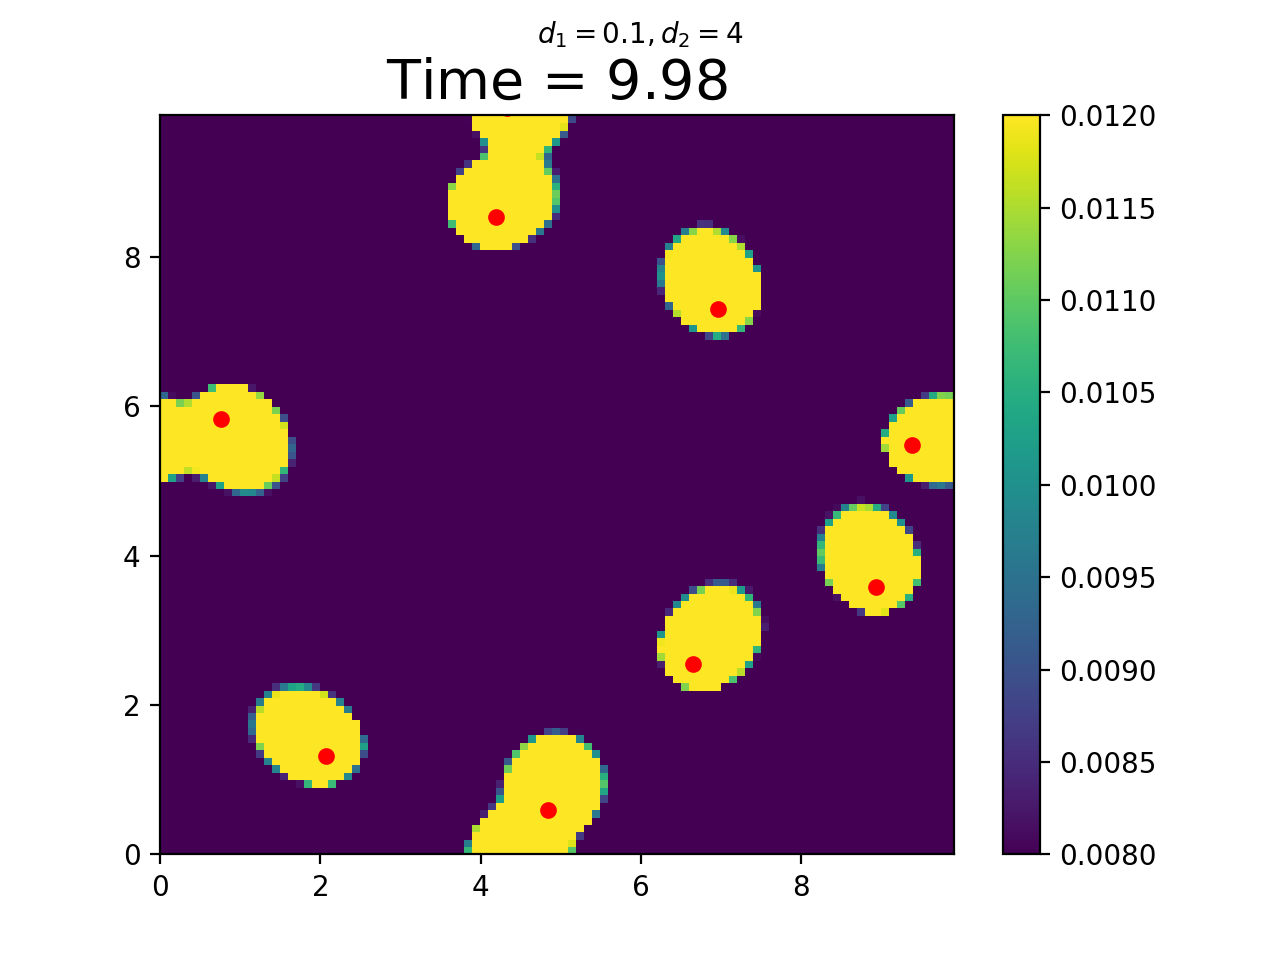

In [15]:
%matplotlib notebook


fig   = plt.figure()
ax    = plt.subplot(1,1,1)
field = ax.pcolormesh(Swimmers.xm,Swimmers.ym,CHEM[0])
field.set_clim(0.008,0.012)
dots, = ax.plot([], [], 'r.',MarkerSize=10)
fig.colorbar(field)

plt.suptitle(r'$d_1 = {0},d_2={1}$'.format(Swimmers.d1, Swimmers.d2), fontsize = 10)

def initit():
    dots.set_data([], [])
    return field,dots

def animate(k):
    arr = CHEM[k]
    arr = arr[:-1, :-1]
    field.set_array(arr.ravel())
    plt.title(r'Time = ${0}$'.format(k*Swimmers.k), fontsize = 20)
    dots.set_data(POS[k][:,0],POS[k][:,1])

    return dots,field
    
anim = animation.FuncAnimation(fig,animate,frames=range(0,simTime,1),
                                          interval=20,blit=False,repeat=False)
plt.show()